Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy
/Users/Deniz/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Accuracy: 
0.594244604317
Confusion Matrix: 
[[561 224]
 [340 265]]


True

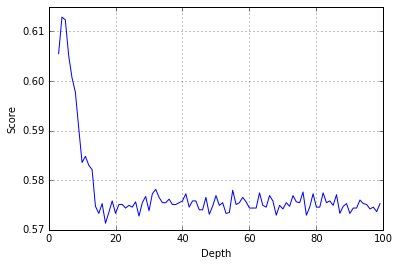

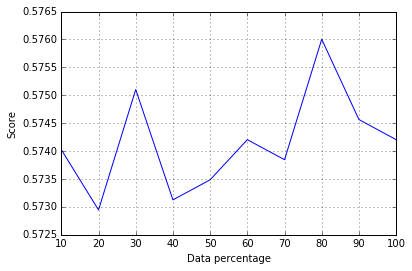

In [2]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
from sklearn import tree
import numpy as np
import csv
import pydotplus
from sklearn import metrics
from sklearn.externals.six import StringIO
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from IPython.display import Image
mtrx = np.matrix(numpy.loadtxt(open("speed_dating_actual_data.csv","rU"),delimiter=",",skiprows=1))
# Creating our label vector
labels = mtrx[:,0]
# Creating our attribute vectors
attr = np.absolute(np.subtract(mtrx[:,7], mtrx[:,1]))
sinc = np.absolute(np.subtract(mtrx[:,8], mtrx[:,2]))
fun = np.absolute(np.subtract(mtrx[:,9], mtrx[:,4]))
inte = np.absolute(np.subtract(mtrx[:,10], mtrx[:,3]))
amb = np.absolute(np.subtract(mtrx[:,11], mtrx[:,5]))
# Creating attributes and labels in separate matrices
X = np.column_stack((attr, sinc, fun, inte, amb))
Y = labels
# Creating the training set, test set and CV set
# First divide in trainingset and testset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# Finding the best depth for the decision tree with CV
score = []
depthval = np.arange(3,100,1)
for i in range(3,100):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(X_train,y_train)
    score.append((cross_val_score(clf, np.squeeze(np.asarray(X_train)), np.squeeze(np.asarray(y_train)), cv=10).mean()))
plt.figure(1)
score = np.asarray(score)
plt.plot(depthval, score)
plt.grid()
plt.xlabel('Depth')
plt.ylabel('Score');
# Plotting the learning curves
data_percentage_array = np.linspace(10, 100, 10)
cv_error = []
for data_percentage in data_percentage_array:
    cv_error.append(cross_val_score(clf, np.squeeze(np.asarray(X_train)), np.squeeze(np.asarray(y_train)),cv=10).mean())
plt.figure(2)
plt.plot(data_percentage_array, cv_error)
plt.grid()
plt.legend(loc=3)
plt.xlabel('Data percentage')
plt.ylabel('Score');
# Implementing the decision tree with depth 4
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train,y_train)
# Find score on test set
print "Accuracy: \n", clf.score(X_test,y_test)
# Confusion matrix
print "Confusion Matrix: \n", sklearn.metrics.confusion_matrix(y_test, clf.predict(X_test))
# Visualising with the Training Data
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
                         feature_names=['attr', 'sinc', 'fun', 'inte', 'amb'],  
                         class_names=['0', '1'],  
                         filled=True, rounded=True,  
                         impurity=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("treesub.pdf")


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Accuracy: 
0.689928057554
Confusion Matrix: 
[[567 218]
 [213 392]]


True

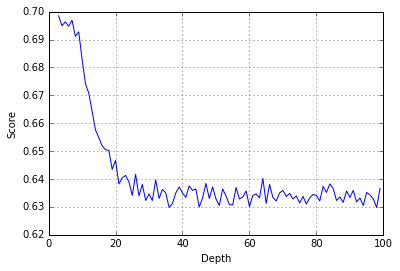

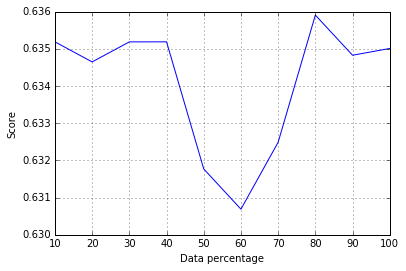

In [3]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
from sklearn import tree
import numpy as np
import csv
import pydotplus
from sklearn import metrics
from sklearn.externals.six import StringIO
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from IPython.display import Image
mtrx = np.matrix(numpy.loadtxt(open("speed_dating_actual_data.csv","rU"),delimiter=",",skiprows=1))
# Creating our label vector
labels = mtrx[:,0]
# Creating our attribute vectors
attr = np.true_divide(mtrx[:,1], mtrx[:,7])
sinc = np.true_divide(mtrx[:,2], mtrx[:,8])
fun = np.true_divide(mtrx[:,4], mtrx[:,9])
inte = np.true_divide(mtrx[:,3], mtrx[:,10])
amb = np.true_divide(mtrx[:,5], mtrx[:,11])
# Creating attributes and labels in separate matrices
X = np.column_stack((np.float32(attr), np.float32(sinc), np.float32(fun), np.float32(inte), np.float32(amb)))
Y = labels
# Creating the training set, test set and CV set
# First divide in trainingset and testset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# Finding the best depth for the decision tree with CV
score = []
depthval = np.arange(3,100,1)
for i in range(3,100):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(X_train,y_train)
    score.append((cross_val_score(clf, np.squeeze(np.asarray(X_train)), np.squeeze(np.asarray(y_train)), cv=10).mean()))
plt.figure(1)
score = np.asarray(score)
plt.plot(depthval, score)
plt.grid()
plt.xlabel('Depth')
plt.ylabel('Score');
# Plotting the learning curves
data_percentage_array = np.linspace(10, 100, 10)
cv_error = []
for data_percentage in data_percentage_array:
    cv_error.append(cross_val_score(clf, np.squeeze(np.asarray(X_train)), np.squeeze(np.asarray(y_train)),cv=10).mean())
plt.figure(2)
plt.plot(data_percentage_array, cv_error)
plt.grid()
plt.legend(loc=3)
plt.xlabel('Data percentage')
plt.ylabel('Score');
# Implementing the decision tree with depth 4
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train,y_train)
# Find score on test set
print "Accuracy: \n", clf.score(X_test,y_test)
# Confusion matrix
print "Confusion Matrix: \n", sklearn.metrics.confusion_matrix(y_test, clf.predict(X_test))
# Visualising with the Training Data
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
                         feature_names=['attr', 'sinc', 'fun', 'inte', 'amb'],  
                         class_names=['0', '1'],  
                         filled=True, rounded=True,  
                         impurity=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("treerat.pdf")

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Homogeneity: 0.037


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118f429d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a786610>]], dtype=object)

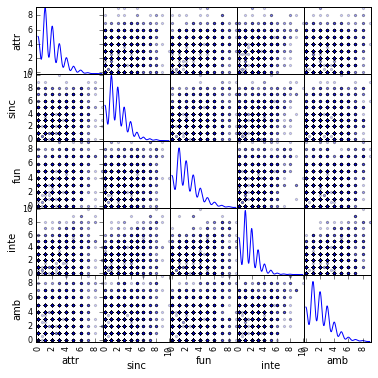

In [62]:
%pylab inline
from sklearn.cluster import KMeans
import numpy as np
import csv
import sklearn
from pandas.tools.plotting import scatter_matrix
mtrx = np.matrix(numpy.loadtxt(open("speed_dating_actual_data.csv","rU"),delimiter=",",skiprows=1))
# Creating our label vector
labels = mtrx[:,0]
# Creating our attribute vectors
attr = np.absolute(np.subtract(mtrx[:,7], mtrx[:,1]))
sinc = np.absolute(np.subtract(mtrx[:,8], mtrx[:,2]))
fun = np.absolute(np.subtract(mtrx[:,9], mtrx[:,4]))
inte = np.absolute(np.subtract(mtrx[:,10], mtrx[:,3]))
amb = np.absolute(np.subtract(mtrx[:,11], mtrx[:,5]))
# Implementing KMeans
X = np.column_stack((attr, sinc, fun, inte, amb))
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmlabels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Calculating the homogeneity
print("Homogeneity: %0.3f" % sklearn.metrics.homogeneity_score(np.squeeze(np.asarray(labels)), kmlabels))
# Visualising the clustering
df = pd.DataFrame(X, columns=['attr', 'sinc', 'fun', 'inte', 'amb'])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

Populating the interactive namespace from numpy and matplotlib
Homogeneity: 0.038


`%matplotlib` prevents importing * from pylab and numpy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ace5550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e4cf0d0>]], dtype=object)

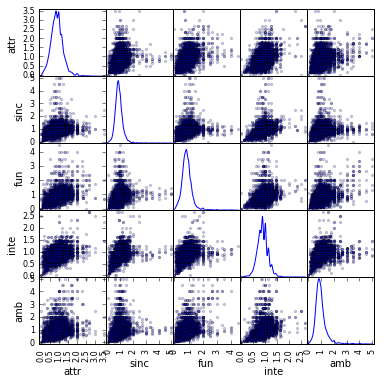

In [64]:
%pylab inline
from sklearn.cluster import KMeans
import numpy as np
import csv
import sklearn
from pandas.tools.plotting import scatter_matrix
mtrx = np.matrix(numpy.loadtxt(open("speed_dating_actual_data.csv","rU"),delimiter=",",skiprows=1))
# Creating our label vector
labels = mtrx[:,0]
# Creating our attribute vectors
attr = np.true_divide(mtrx[:,1], mtrx[:,7])
sinc = np.true_divide(mtrx[:,2], mtrx[:,8])
fun = np.true_divide(mtrx[:,4], mtrx[:,9])
inte = np.true_divide(mtrx[:,3], mtrx[:,10])
amb = np.true_divide(mtrx[:,5], mtrx[:,11])
# Implementing KMeans
X = np.column_stack((attr, sinc, fun, inte, amb))
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmlabels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Calculating the homogeneity
print("Homogeneity: %0.3f" % sklearn.metrics.homogeneity_score(np.squeeze(np.asarray(labels)), kmlabels))
# Visualising the clustering
df = pd.DataFrame(X, columns=['attr', 'sinc', 'fun', 'inte', 'amb'])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')